In [1]:
import warnings
warnings.filterwarnings('ignore')
# %matplotlib notebook

# Soil moisture analysis switzerland

Comparison of modelled soil moisture (PREVAH, ERA5, ERA5-Land, Lisflood, UERRA) with in-situ soil
 moisture from the SwissSMEX (SWMX) dataset.
 
## Datasets
Model data were interpolated to represent soil moisture at the same depth (50 cm) as the in
situ measurement.
### Models
* ERA5: [DOI: 10.24381/cds.adbb2d47](https://doi.org/10.24381/cds.adbb2d47)
* ERA5-Land: [DOI: 10.24381/cds.e2161bac](https://doi.org/10.24381/cds.e2161bac)
* UERRA (MESCAN-SURFEX): [access through CDS](cds.climate.copernicus.eu/cdsapp#!/dataset/reanalysis-uerra-europe-complete?tab=overview)
* LISFLOOD: [DOI: 10.23381/cds.3458969](https://doi.org/10.23381/cds.3458969)
* PREVAH: Zappa and Gurtz (2003) [DOI: 10.1007/s10346-020-01400-y](https://doi.org/10.1007/s10346-020-01400-y); 
    Viviroli et al. (2009) [DOI: 10.1016/j.envsoft.2009.004.001](https://doi.org/10.1016/j.envsoft.2009.004.001)

PREVAH represents a high-resolution, locally optimised hydrological model and acts as a reference
for this comparison.

### Reference
SwissSMEX in-situ measurements: Mittelbach and Seneviratne (2012)
    [DOI: 10.5194/hess-16-2169-2012](https://doi.org/10.5194/hess-16-2169-2012)

We selected 6 stations with long and uninterrupted time-series:
* Payerne
* Plaffeien
* Wynau
* Chamau
* Reckenholz
* Taenikon

![Map with SwissSMEX sites](map.png)

In [2]:
import pandas as pd

swmx_sites = pd.read_csv('/mnt/CEPH_PROJECTS/ADO/SM/reference_data/SiteInfo_SwissSMEX0713_grassland_selected.csv',
                         skiprows=1)
print(swmx_sites.loc[:, ['Site', 'Elevation', 'Landuse', 'Texture', 'ID']])

         Site  Elevation    Landuse     Texture  ID
0     Payerne        490  grassland        loam   2
1   Plaffeien       1042  grassland  sandy loam   3
2       Wynau        422  grassland   silt loam   7
3      Chamau        400  grassland  sandy loam   8
4  Reckenholz        443  grassland        loam  10
5    Taenikon        536  grassland        loam  11


## Methods

* SwissSMEX in-situ measurements were converted from mm to m^3/m^-3: $SM_{vol} = SM_{mm} / 500$
* To offset the impact of biases between the different models, the comparison is based on anomalies (SMA). We used
to following equation to compute SMA's: $SMA = SM_t - \bar{SM} / \delta_{SM}$ where $SM_t$ is the
current value of SM on any given data, $\bar{SM}$ is the long-term average, and $\delta_{SM}$ the related
standard deviation. The reference period was selected for each site individually, based on the temporal overlap between
all models.

## Analysis - Stations

In [3]:
from model_comparison import initialize_stacks
ERA5, ERA5l, LISFLOOD, UERRA = initialize_stacks()

The following section shows several plots for each of the six selected SwissSMEX sites: time-series plots
covering the full period of available data; time-series plots just for the years 2012 and 2018; Scatterplots
which show a direct comparison between in-situ and modelled soil moisture.

The following table summarized the accuracy of modelled soil moisture, in terms of R and RMSE, with
respect to the SwissSMEX measurements.

**R**

|--------|Payerne  |Plaffeien|Wynau    |Chamau   |Reckenholz|Taenikon  |
|--------|---------|---------|---------|---------|----------|----------|
|PREVAH  |0.705    |**0.678**|**0.749**|0.437    |0.642     |0.624     |
|ERA5    |0.617    |0.592    |0.680    |0.442    |0.614     |0.574     |
|ERA5-L  |0.641    |0.536    |0.745    |0.455    |0.585     |0.547     |
|LISFLOOD|**0.736**|0.544    |0.712    |0.194    |**0.794** |**0.778** |
|UERRA   |0.721    |**0.678**|0.634    |**0.541**|0.539     |0.657     |

**RMSE**

|--------|Payerne  |Plaffeien|Wynau    |Chamau   |Reckenholz|Taenikon  |
|--------|---------|---------|---------|---------|----------|----------|
|PREVAH  |0.803    |0.842    |**0.760**|1.164    |0.908     |0.906     |
|ERA5    |0.910    |0.928    |0.837    |1.064    |0.905     |0.938     |
|ERA5-L  |0.865    |1.005    |0.749    |1.059    |0.934     |0.964     |
|LISFLOOD|**0.752**|0.859    |0.775    |1.274    |**0.670** |**0.662** |
|UERRA   |0.761    |**0.835**|0.917    |**0.992**|0.961     |0.849     |

This first overview shows that correlations are relatively low in general. Interestingly,
higher spatial resolution does not always lead to higher accuracies. Performances are relatively
similar across the tested models.


### Payerne

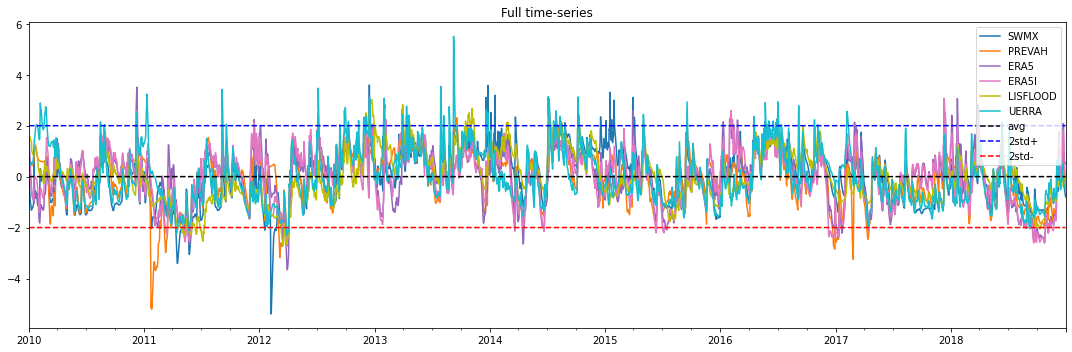

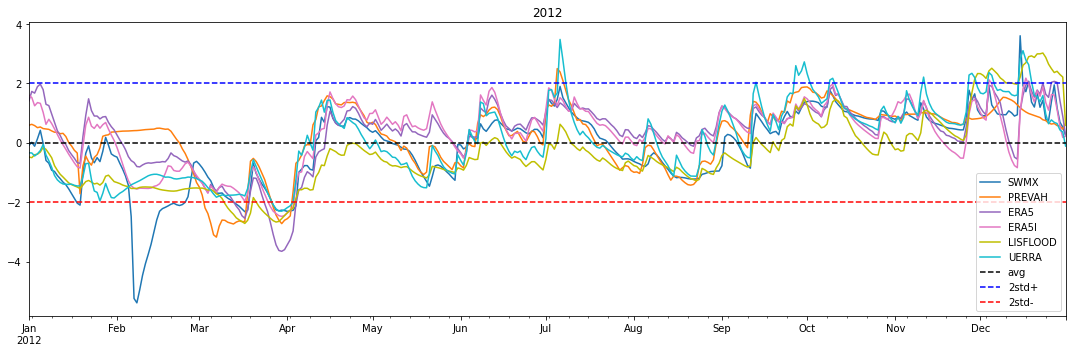

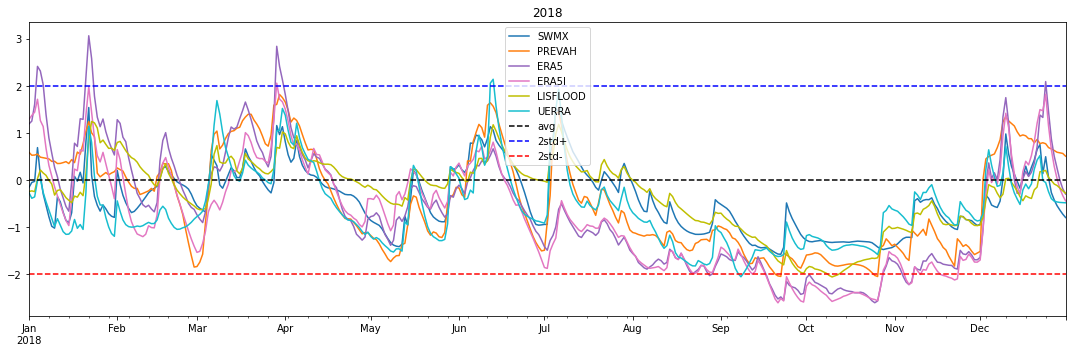

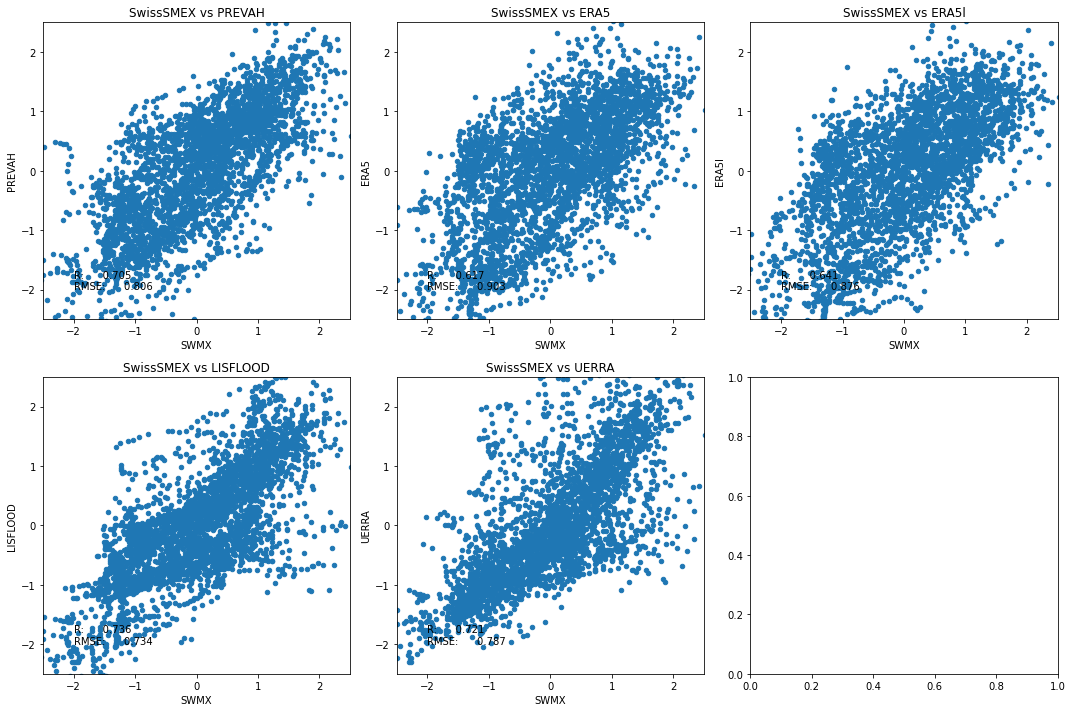

In [4]:
from model_comparison import SwissSMEX_ts_create_plots

# setting
interval = 1
monthly=True
anomalies=True
year = [2012, 2018]

i_swmx = 'PAY'
anom_merged, merged = SwissSMEX_ts_create_plots(ERA5, ERA5l,
                                                     LISFLOOD,
                                                     UERRA,
                                                     swmx_sites.iloc[0],
                                                     interval,
                                                     year=year)

mindex = pd.MultiIndex.from_tuples([(i_swmx, i) for i in anom_merged.columns])
all_stations = merged.copy()
all_stations.columns = mindex

### Plaffeien

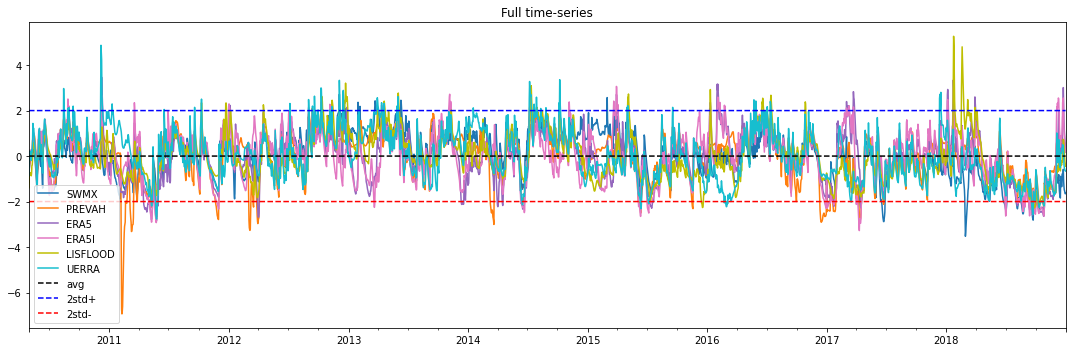

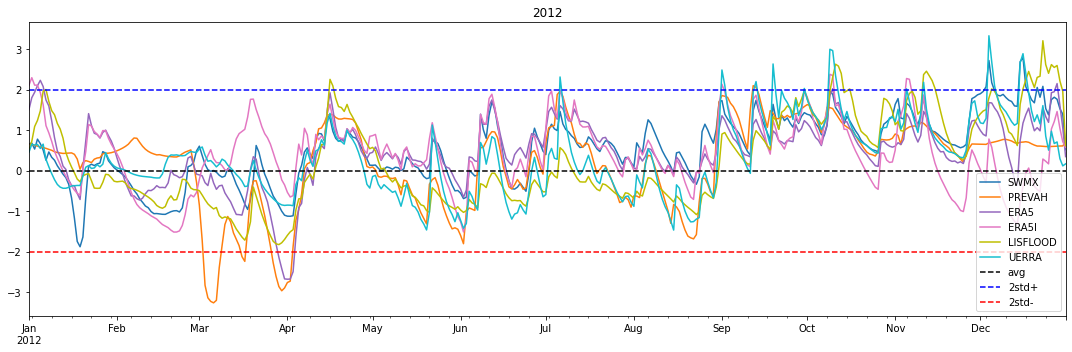

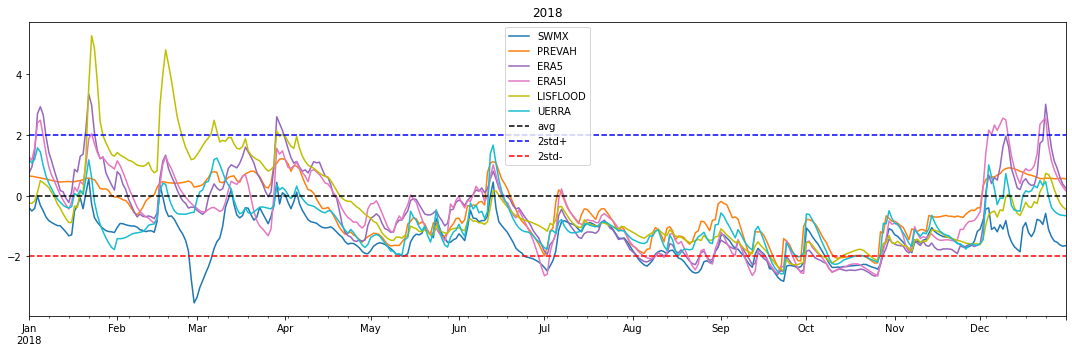

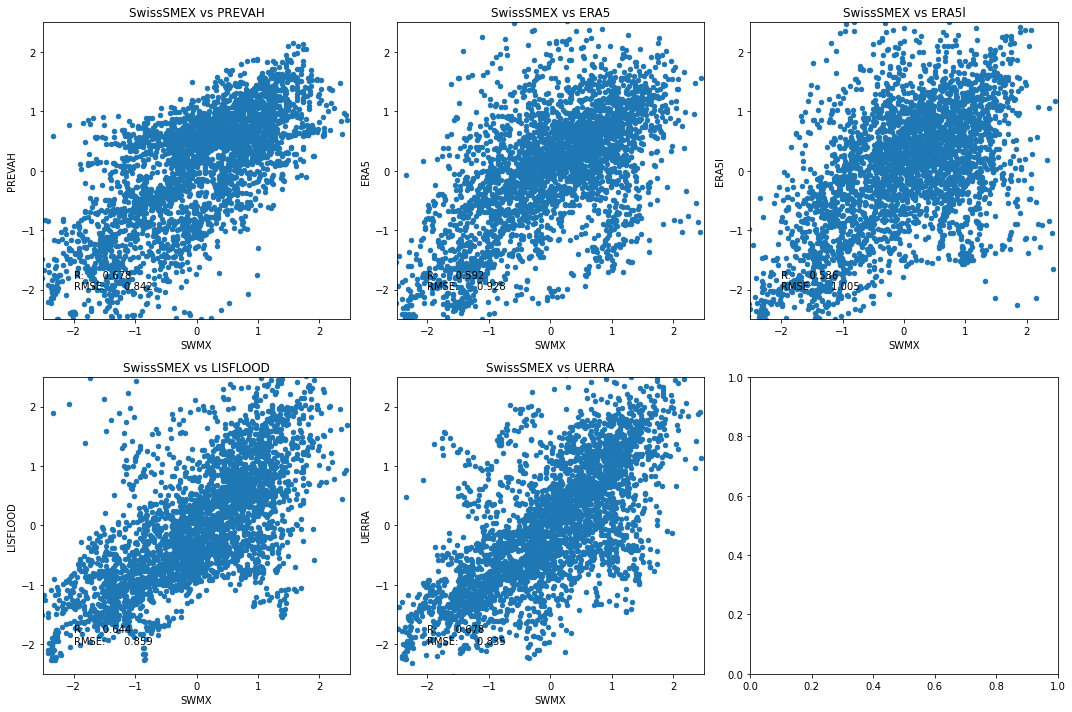

In [5]:
i_swmx = 'PLA'
anom_merged, merged = SwissSMEX_ts_create_plots(ERA5, ERA5l,
                                        LISFLOOD,
                                        UERRA,
                                        swmx_sites.iloc[1],
                                        interval,
                                        year=year)

mindex = pd.MultiIndex.from_tuples([(i_swmx, i) for i in anom_merged.columns])

tmp = merged.copy()
tmp.columns = mindex
all_stations = pd.concat([tmp, all_stations], axis=1)

### Wynau

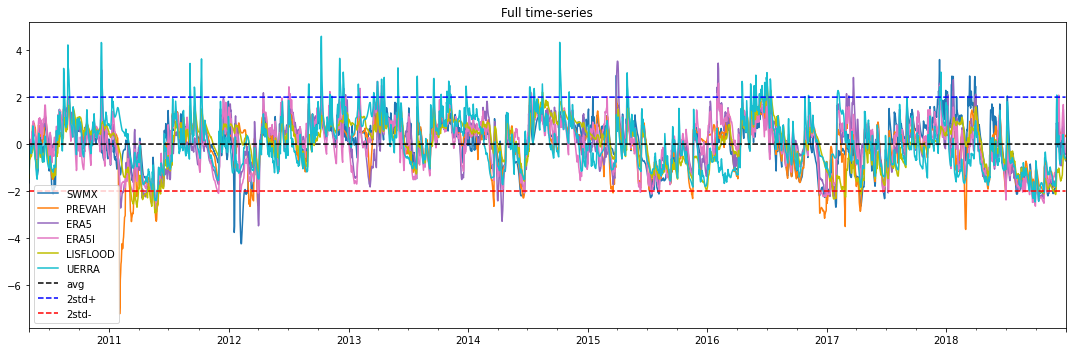

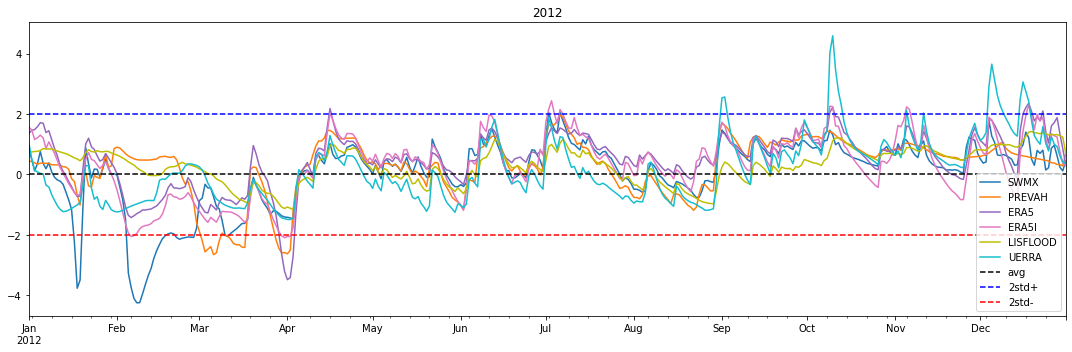

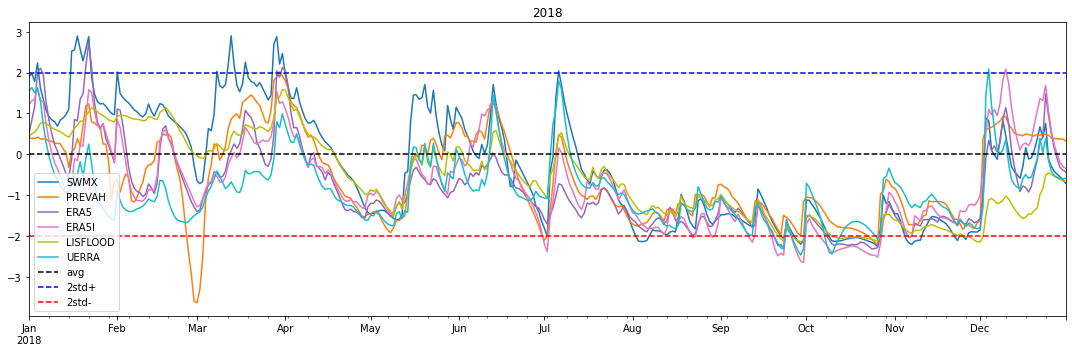

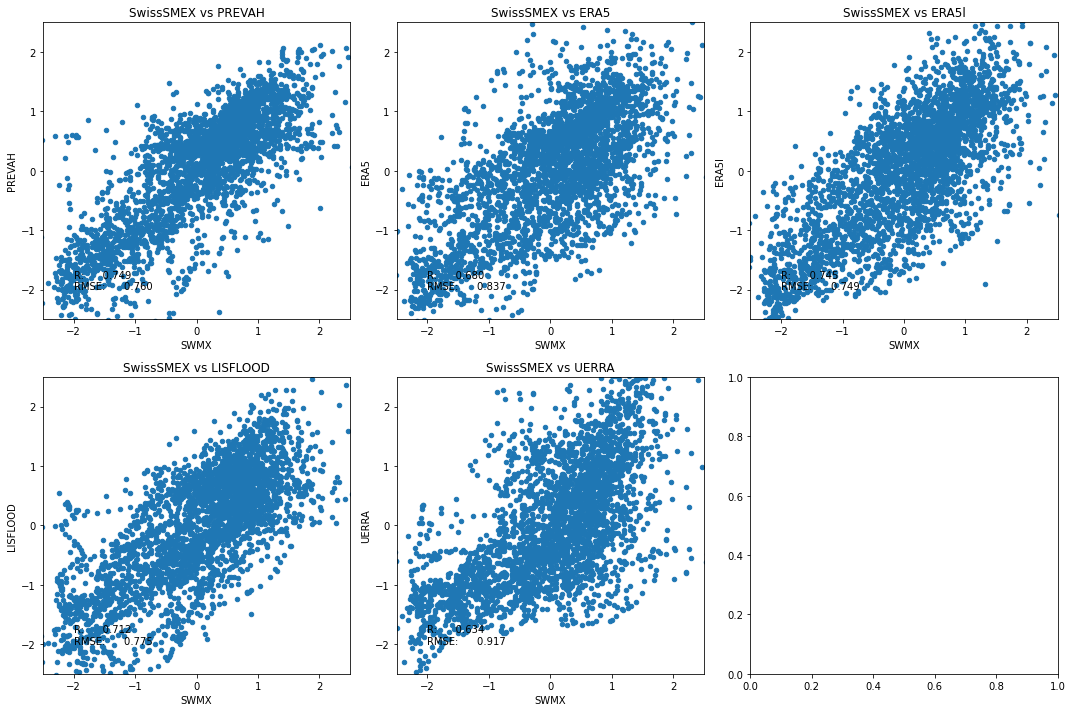

In [6]:
i_swmx = 'WYN'
anom_merged, merged = SwissSMEX_ts_create_plots(ERA5, ERA5l,
                                        LISFLOOD,
                                        UERRA,
                                        swmx_sites.iloc[2],
                                        interval,
                                        year=year)

mindex = pd.MultiIndex.from_tuples([(i_swmx, i) for i in anom_merged.columns])

tmp = merged.copy()
tmp.columns = mindex
all_stations = pd.concat([tmp, all_stations], axis=1)

### Chamau

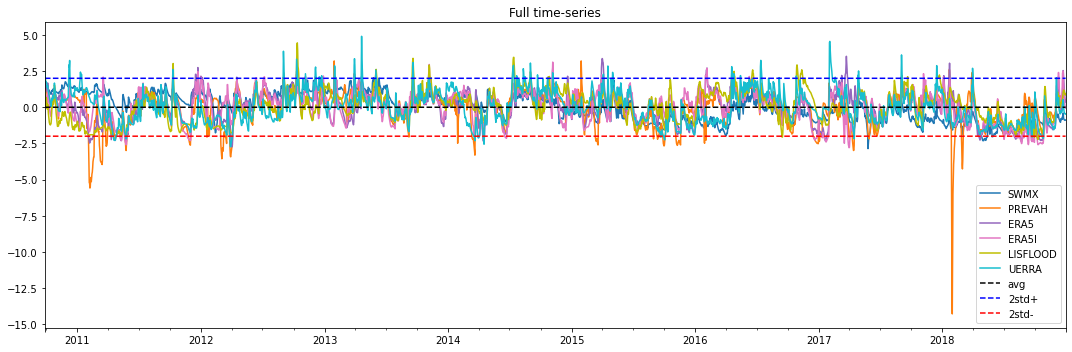

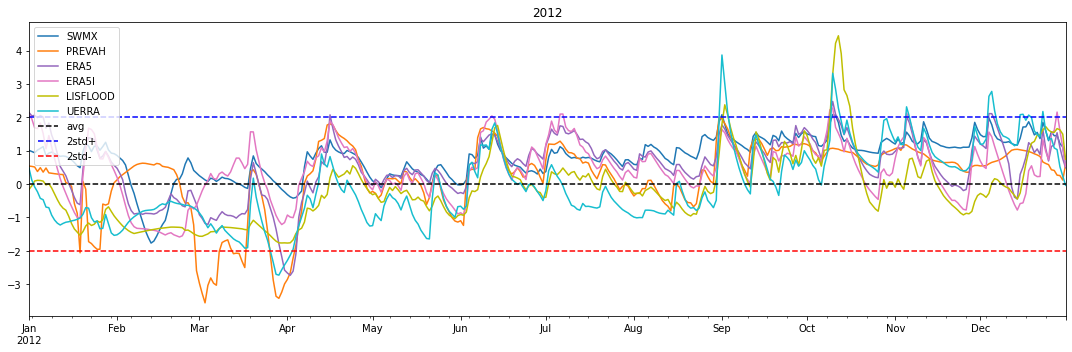

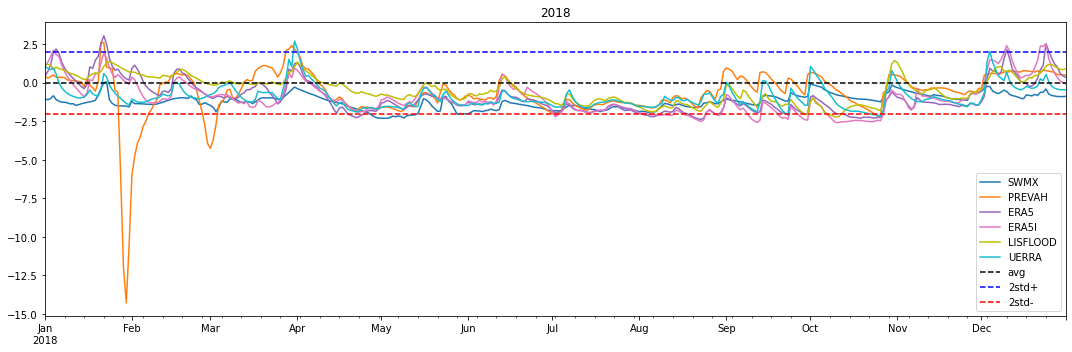

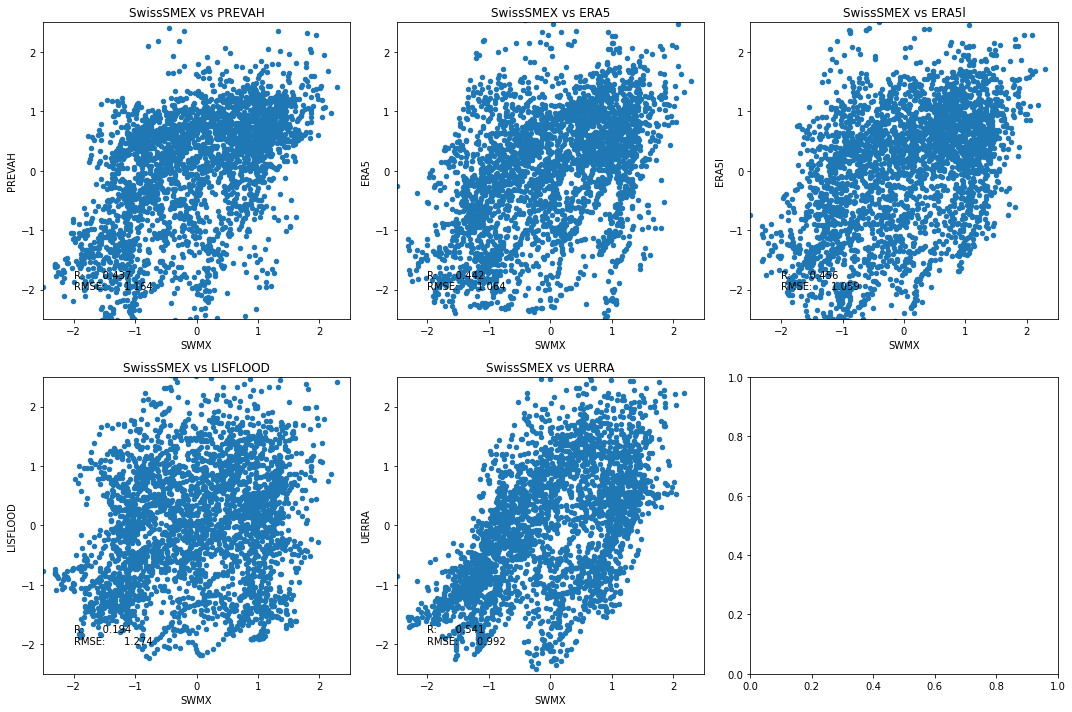

In [7]:
i_swmx = 'CHM'
anom_merged, merged = SwissSMEX_ts_create_plots(ERA5, ERA5l,
                                        LISFLOOD,
                                        UERRA,
                                        swmx_sites.iloc[3],
                                        interval,
                                        year=year)

mindex = pd.MultiIndex.from_tuples([(i_swmx, i) for i in anom_merged.columns])

tmp = merged.copy()
tmp.columns = mindex
all_stations = pd.concat([tmp, all_stations], axis=1)

### Reckenholz

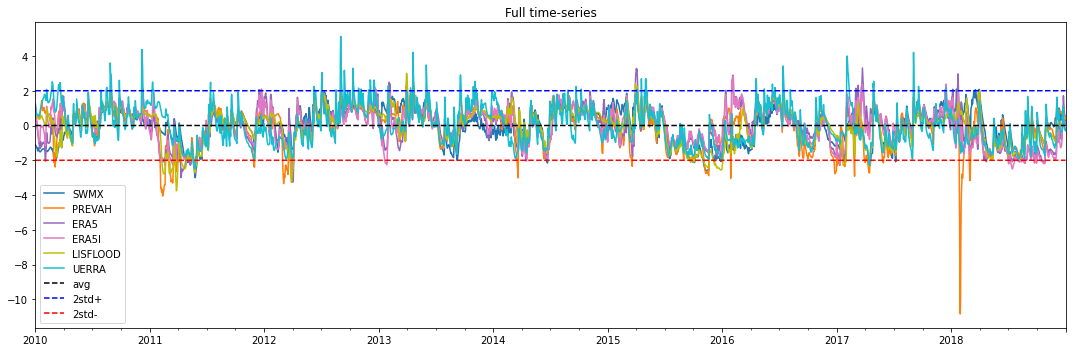

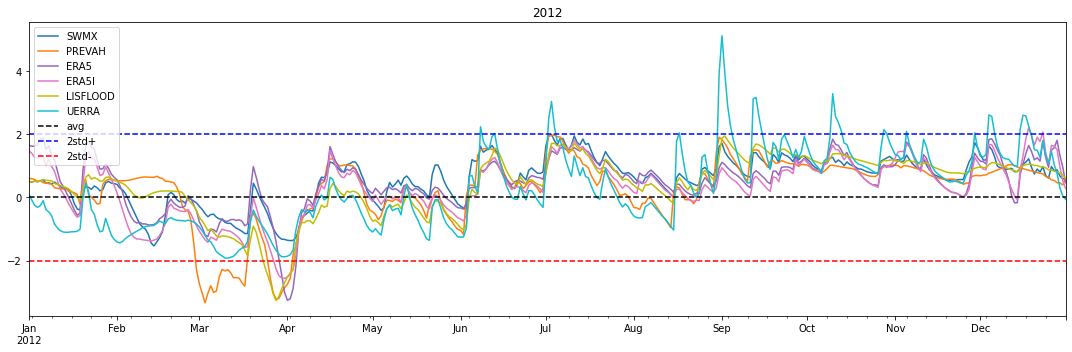

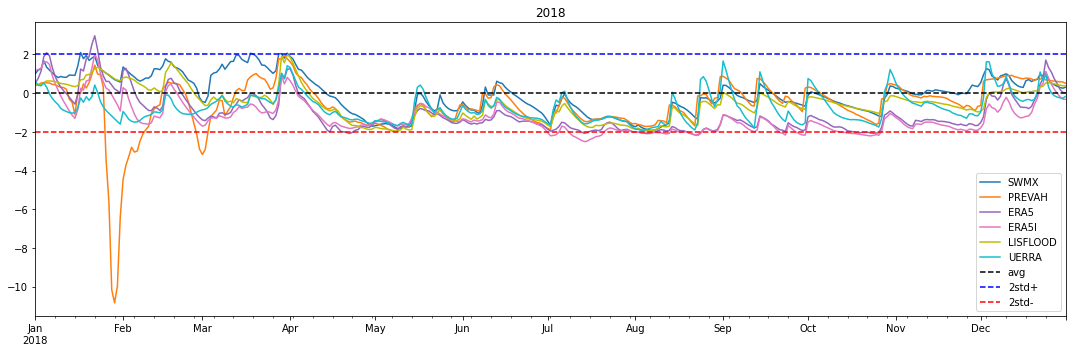

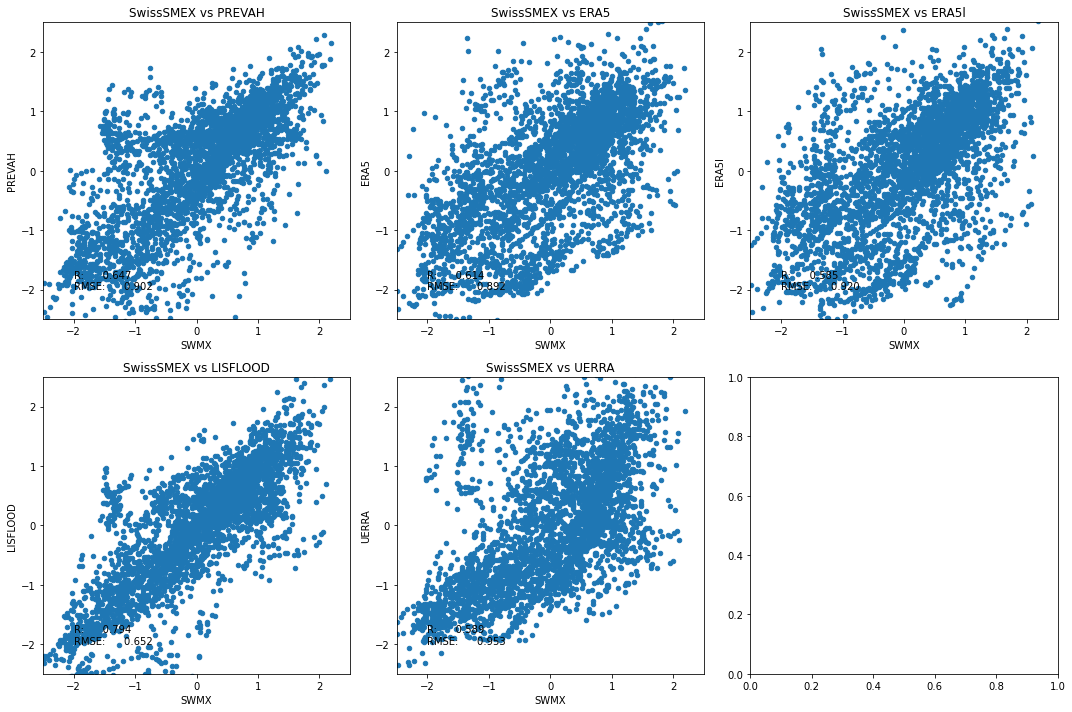

In [8]:
i_swmx = 'REC'
anom_merged, merged = SwissSMEX_ts_create_plots(ERA5, ERA5l,
                                        LISFLOOD,
                                        UERRA,
                                        swmx_sites.iloc[4],
                                        interval,
                                        year=year)

mindex = pd.MultiIndex.from_tuples([(i_swmx, i) for i in anom_merged.columns])

tmp = merged.copy()
tmp.columns = mindex
all_stations = pd.concat([tmp, all_stations], axis=1)

### Taenikon

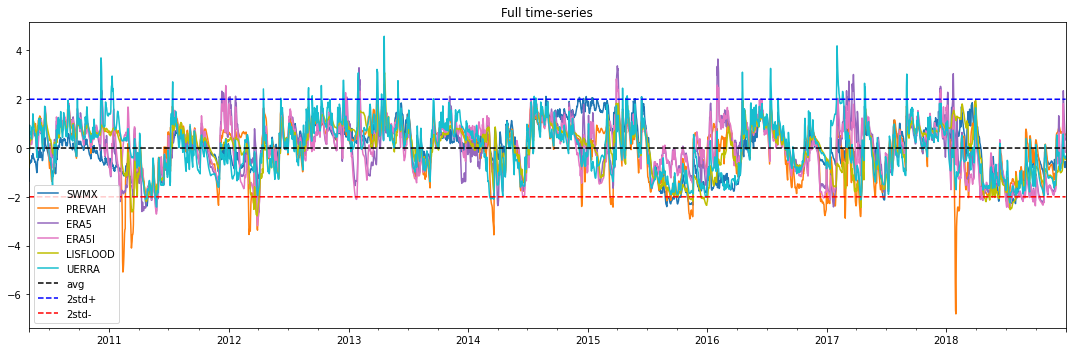

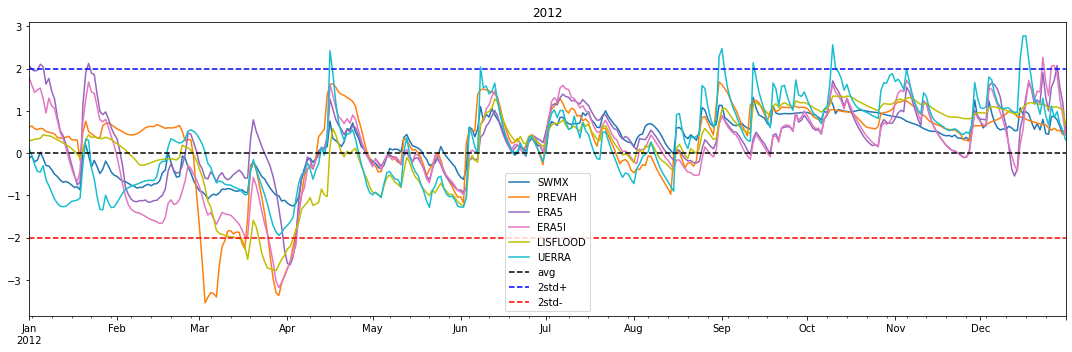

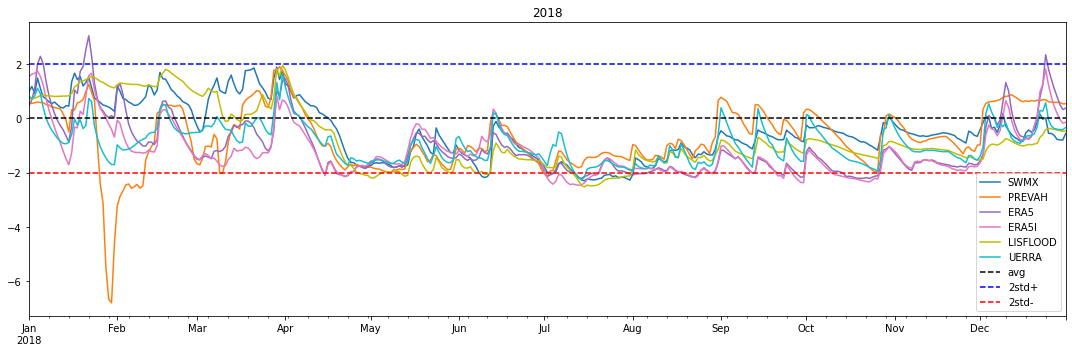

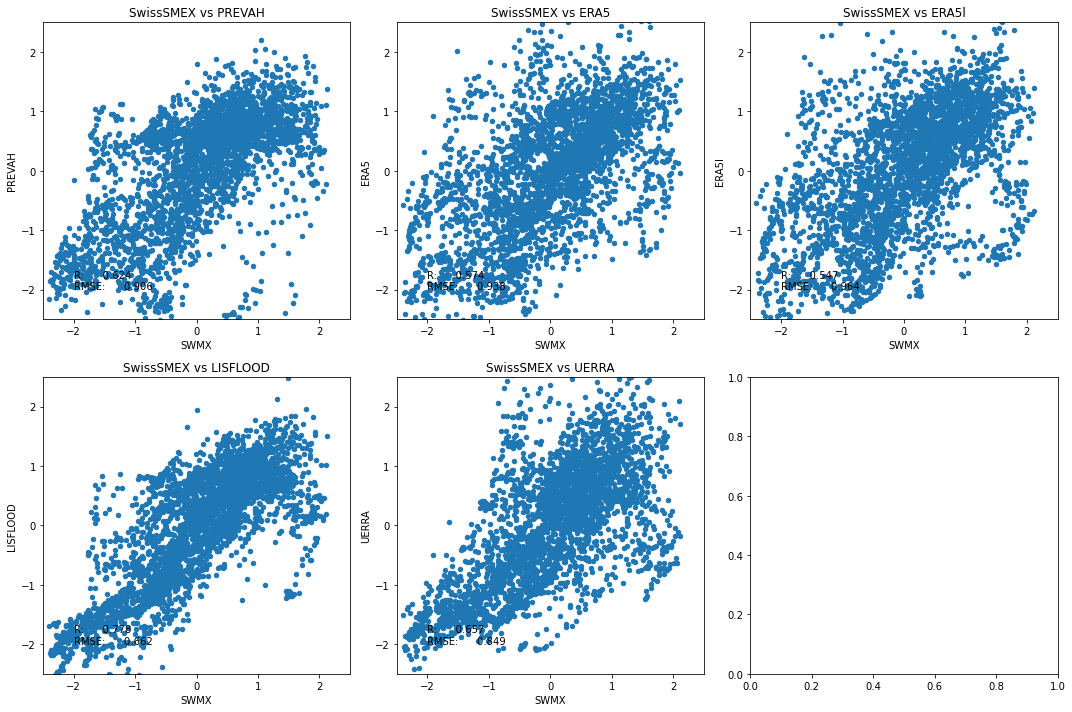

In [9]:
i_swmx = 'TAE'
anom_merged, merged = SwissSMEX_ts_create_plots(ERA5, ERA5l,
                                        LISFLOOD,
                                        UERRA,
                                        swmx_sites.iloc[5],
                                        interval,
                                        year=year)

mindex = pd.MultiIndex.from_tuples([(i_swmx, i) for i in anom_merged.columns])

tmp = merged.copy()
tmp.columns = mindex
all_stations = pd.concat([tmp, all_stations], axis=1)

## Analysis - overall
The plots below shows the time-series of average soil moisture

In [10]:
avg_stations = all_stations.groupby(level=0, axis=1).mean()
avg_stations.describe()

CHM          PAY          PLA          REC          TAE  \
count  3652.000000  3652.000000  3652.000000  3652.000000  3652.000000   
mean      0.421524     0.358543     0.398264     0.423104     0.424416   
std       0.063354     0.083134     0.060954     0.078709     0.074865   
min       0.178316     0.161456     0.189400     0.174033     0.170891   
25%       0.390222     0.290113     0.362021     0.370791     0.380850   
50%       0.447175     0.378157     0.419099     0.450298     0.450226   
75%       0.468055     0.432653     0.446730     0.485696     0.481081   
max       0.499330     0.488546     0.486162     0.534986     0.537838   

               WYN  
count  3652.000000  
mean      0.406290  
std       0.073957  
min       0.190557  
25%       0.363023  
50%       0.427359  
75%       0.464730  
max       0.521557